# APIs

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier

# Pipeline 1

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [5]:
pipe = Pipeline([('scaler', MinMaxScaler()),
                 ('svm', SVC())])

pipe.fit(X_train, y_train)
print(f'Test score: {pipe.score(X_test, y_test):.2f}')

Test score: 0.97


# Pipeline in Grid Searches

In [6]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'Best CV accuracy: {grid.best_score_:.2f}')
print(f'Test set score: {grid.score(X_test, y_test):.2f}')
print(f'Best parameters: {grid.best_params_}')

Best CV accuracy: 0.98
Test set score: 0.97
Best parameters: {'svm__C': 1, 'svm__gamma': 1}


# make_pipeline

In [7]:
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [8]:
print(f'Pipeline steps:\n{pipe_short.steps}')

Pipeline steps:
[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


# Step Attributes

In [9]:
pipe_short.fit(X_train, y_train)
dual_coef = pipe_short.named_steps['svc'].dual_coef_
print(dual_coef.shape)

(1, 56)


# Attributes in Grid Search

In [10]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [11]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [12]:
print(f'Best estimator:\n{grid.best_estimator_}')

Best estimator:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1))])


In [13]:
print(f'Logistic Regression coefficients:\n{grid.best_estimator_.named_steps['logisticregression'].coef_}')

Logistic Regression coefficients:
[[-0.4475566  -0.34609376 -0.41703843 -0.52889408 -0.15784407  0.60271339
  -0.71771325 -0.78367478  0.04847448  0.27478533 -1.29504052  0.05314385
  -0.69103766 -0.91925087 -0.14791795  0.46138699 -0.1264859  -0.10289486
   0.42812714  0.71492797 -1.08532414 -1.09273614 -0.85133685 -1.04104568
  -0.72839683  0.07656216 -0.83641023 -0.64928603 -0.6491432  -0.42968125]]


# Grid Searching Preprocessing Steps

In [14]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=0)

In [17]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [ ]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

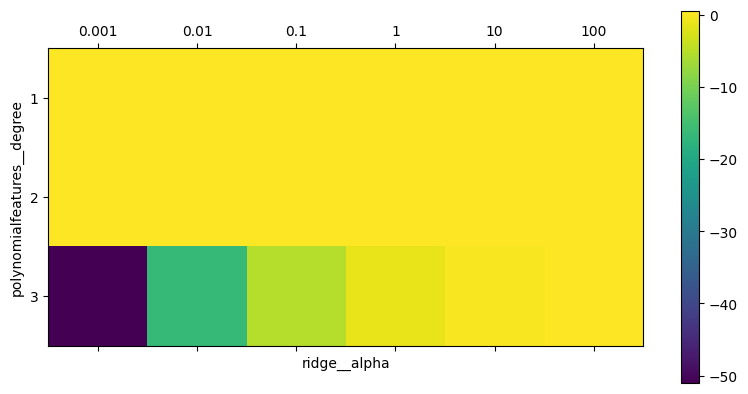

In [21]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), cmap='viridis')
plt.xlabel('ridge__alpha')
plt.ylabel('polynomialfeatures__degree')
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.colorbar()

In [24]:
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_:.3f}')

Best parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 10}
Best score: 0.516


In [26]:
print(f'Test set score: {grid.score(X_test, y_test):.3f}')

Test set score: 0.358


# Grid Searching over Models

In [28]:
pipe = Pipeline([('preprocessing', StandardScaler()),
                 ('classifier', SVC())])

In [29]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
     {'classifier': [RandomForestClassifier(n_estimators=100)],
      'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}
]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler(), None]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [31]:
print(f"Best params:\n{grid.best_params_}\n")
print(f"Best cross-validation score: {grid.best_score_:.2f}")
print(f"Test-set score: {grid.score(X_test, y_test):.2f}")

Best params:
{'classifier': SVC(), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.99
Test-set score: 0.98
